## Что такое PyTorch?

Это пакет научных вычислений на основе Python, ориентированный 
на:

-  Замена NumPy для использования мощности графических процессоров
-  исследовательская платформа глубокого обучения, обеспечивающая максимальную гибкость и скорость






Тензоры похожи на ndarrays NumPy, но они могут использоваться на графическом процессоре, для ускорения вычислений.



In [ ]:
%matplotlib inline

In [ ]:
from __future__ import print_function
import torch

Создаем неинициализрованную матрицу 5x3:



In [ ]:
x = torch.empty(5, 3)
print(x)

Создает случайно инициализированную матрицу:



In [ ]:
x = torch.rand(5, 3)
print(x)

Заполняем матрицу нулями:



In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

Создаем тензор из имеющихся данных:



In [ ]:
x = torch.tensor([5.5, 3])
print(x)

Можем посмотреть размер:



In [ ]:
print(x.size())

Сложение тензоров:



In [ ]:
y = torch.tensor([3.14, 15.92])

result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

In [ ]:
# adds x to y
y.add_(x)

Вы можете использовать стандартную индексацию, подобную NumPy, со всеми наворотами!

In [ ]:
print(x[:, 1])

Для изменение размера: если вы хотите изменить размер/форму тензора, вы можете использовать ``torch.view``:



In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
# the size -1 is inferred from other dimensions
z = x.view(-1, 8)  
print(x.size(), y.size(), z.size())


Если у вас есть одноэлементный тензор, используйте ```.item()```, чтобы получить значение:

In [ ]:
x = torch.randn(1)
print(x)
print(type(x.item()), x.item())

**Дополнительно:**


  
100+ тензорных операций, включая транспонирование, индексирование, нарезку,
  математические операции, линейная алгебра, случайные числа и т. д.:
  [docs torch](https://pytorch.org/docs/torch).

### NumPy Bridge


Преобразование Tensor Torch в массив NumPy и наоборот $-$ это просто:




In [23]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [24]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


Обратите внимание, что зна значение массива numpy также изменилось:

In [25]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Изменение массива numpy автоматически изменяет тензор Torch:

In [26]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


Все тензоры на CPU, кроме CharTensor, поддерживают преобразование в NumPy и обратно.

### CUDA Tensors


Тензоры можно перенести на любое устройство с помощью метода ``.to`` .



In [27]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    # a CUDA device object
    device = torch.device("cuda")          
    # directly create a tensor on GPU
    y = torch.ones_like(x, device=device)  
    # or just use strings ``.to("cuda")``
    x = x.to(device)                       
    z = x + y
    print(z)
    # ``.to`` can also change dtype together!
    print(z.to("cpu", torch.double))       

tensor([0.4906], device='cuda:0')
tensor([0.4906], dtype=torch.float64)


### AUTOGRAD: Automatic Differentiation



Центральным элементом всех нейронных сетей в PyTorch является пакет autograd. 
Пакет autograd обеспечивает автоматическое дифференцирование для всех операций с тензорами. Это «define by run» фреймворк , что означает, что обратная связь определяется тем, как выполняется код, и что каждая итерация может отличаться.


```torch.Tensor``` - центральный класс пакета. Если вы установите для его атрибута ```.requires_grad``` значение True, он начнет отслеживать все операции с ним. Когда вы закончите свои вычисления, вы можете вызвать ```.backward()```, и все градиенты будут вычислены автоматически. Градиент для этого тензора будет накапливаться в атрибуте ```.grad```.

Чтобы тензор не отслеживал историю, вы можете вызвать ```.detach()```, чтобы отделить его от истории вычислений и предотвратить отслеживание будущих вычислений.

Чтобы предотвратить отслеживание истории (и использование памяти), вы также можете заключить блок кода в ``torch.no_grad():``. Это может быть особенно полезно при оценке модели, поскольку у модели могут быть обучаемые параметры с require_grad = True, для которых нам не нужны градиенты.


In [28]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [29]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


``y`` был создан в результате операции, поэтому у него есть ``grad_fn``.

In [30]:
print(y.grad_fn)

Добавим еще одну операцию:

In [31]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


### Gradients

А теперь посмотрим, как будет действовать backprop. Поскольку out содержит один скаляр, ``out.backward()`` эквивалентен `out.backward(torch.tensor(1.))``.

In [32]:
out.backward()

Напечатаем градиенты: d(out)/dx:

In [33]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


Мы получили матрицу, которая состоит из ``4.5``. 
Пусть $o$ это тензор ``out``, тогда $$o = \frac{1}{4}\sum_i z_i,$$
$$z_i = 3(x_i+2)^2$$ и $$z_i\bigr\rvert_{x_i=1} = 27.$$

Получаем:
$$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2),$$ следовательно
$$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5.$$

### Training a classifier



In [36]:
import torch
import torchvision

In [37]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [38]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('.files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)


Посмотрим на датасет:

In [39]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

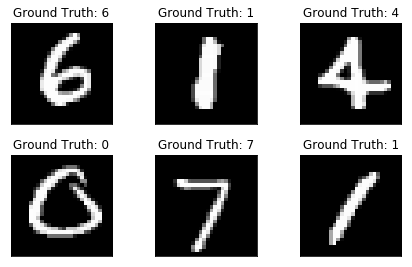

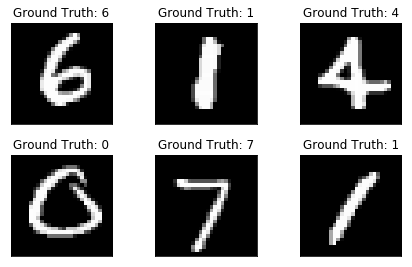

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [41]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Задаем граф вычислений:

In [43]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

Инициализируем сеть:

In [44]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [45]:
train_losses = []
train_counter = []

Функция обучения:

In [46]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))

            train_losses.append(loss.item())
            train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), './model.pth')
            torch.save(optimizer.state_dict(), './optimizer.pth')

In [47]:
for epoch in range(1, n_epochs + 1):
    train(epoch)

<ipython-input-43-6c2218f37724>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.315883
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.313233
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.293234
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.240104
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.265325
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.272384
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.178395
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.172720
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.101447
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.084201
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.924963
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.843520
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.667681
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.573414
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.332311
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.414763
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.253356
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.061739
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.047650
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.253063
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.172070
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.309964
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.333713
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.263543
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.227558
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.512598
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.431775
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.441260
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.380131
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.337714
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.320832
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.213622
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.310908
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.300072
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.197835
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.291199
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.381986
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.416790
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.227417
Train Epoch: 2 [58240/60000 (97%)]	Loss: 0.543262


Нарисуем loss кривую:

Text(0, 0.5, 'negative log likelihood loss')

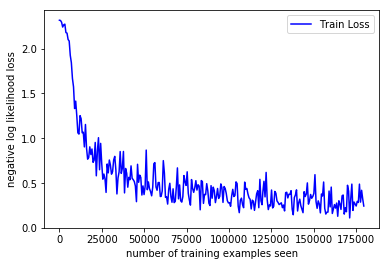

In [48]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

Дополнительная информация:
* [PyTorch tutorials](https://pytorch.org/tutorials/)